<h3>1. Import dependencies</h3>

In [1]:
import pandas as pd
import numpy as np
import torch

from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from utils.scores import purity_score as purity

from src import KMeans

from matplotlib import pyplot as plt

<h3>2. Import data</h3>

In [2]:
iris_dataset = pd.read_csv('iris.csv', na_values='?')
iris_dataset = iris_dataset.fillna(0)

X_1 = torch.from_numpy(iris_dataset.iloc[:,0:len(iris_dataset.columns)-1].to_numpy())
y_tmp_1 = iris_dataset.iloc[:,len(iris_dataset.columns)-1].to_numpy()
label_encoder_1 = preprocessing.LabelEncoder()
y_1 = torch.from_numpy(label_encoder_1.fit_transform(np.asarray(y_tmp_1)))
iris_num_class = 3

<h3>3. K-Means</h3>

In [3]:
km = KMeans(3)

In [4]:
km.fit(X_1)

In [5]:
iris_silhouette = silhouette_score(X_1, km.labels_, metric='euclidean')
iris_accuracy = purity(y_1, km.labels_)*100
iris_num_clusters = len(np.unique(km.labels_))

In [6]:
print("[Unsupervised Performance] Silhouette Score: {}".format(iris_silhouette))
print("[Supervised   Performance] Accuracy: {} %".format(iris_accuracy))
print("Predicted number of clusters: {}".format(iris_num_clusters))
print("Number of classes: {}".format(iris_num_class))

[Unsupervised Performance] Silhouette Score: 0.5509643746707443
[Supervised   Performance] Accuracy: 88.66666666666667 %
Predicted number of clusters: 3
Number of classes: 3


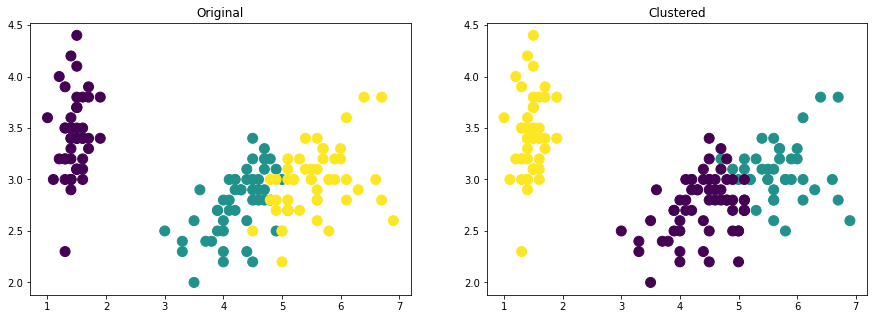

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax[0].scatter(X_1.cpu().numpy()[:, 2], X_1.cpu().numpy()[:, 1],
                 c=y_1.cpu().numpy(), s=100)
ax[0].set_title('Original')

ax[1].scatter(X_1.cpu().numpy()[:, 2], X_1.cpu().numpy()[:, 1],
                 c=km.labels_.cpu().numpy(), s=100)
ax[1].set_title('Clustered')

plt.show()

<h3>3. Spherical K-Means</h3>

In [8]:
skm = KMeans(3, spherical=True)

In [9]:
skm.fit(X_1)

In [10]:
iris_ssilhouette = silhouette_score(X_1, skm.labels_, metric='cosine')
iris_saccuracy = purity(y_1, skm.labels_)*100

In [11]:
print("[Unsupervised Performance] Cosine Silhouette Score: {}".format(iris_ssilhouette))
print("[Supervised   Performance] Accuracy: {} %".format(iris_saccuracy))

[Unsupervised Performance] Cosine Silhouette Score: 0.7489936586396754
[Supervised   Performance] Accuracy: 96.66666666666667 %


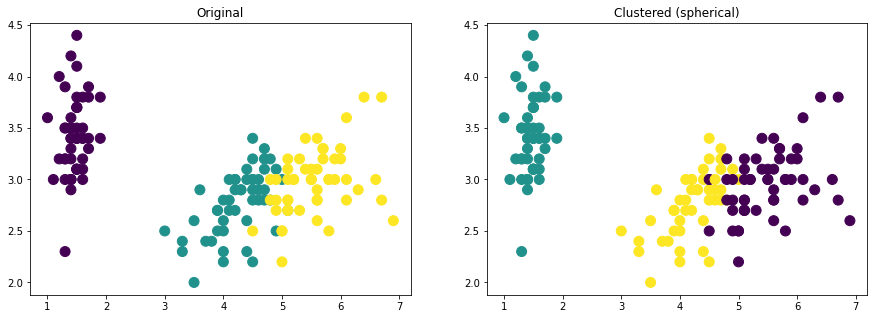

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax[0].scatter(X_1.cpu().numpy()[:, 2], X_1.cpu().numpy()[:, 1],
                 c=y_1.cpu().numpy(), s=100)
ax[0].set_title('Original')

ax[1].scatter(X_1.cpu().numpy()[:, 2], X_1.cpu().numpy()[:, 1],
                 c=skm.labels_.cpu().numpy(), s=100)
ax[1].set_title('Clustered (spherical)')

plt.show()